Portfolio Básico

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

stocks = ['VZ', 'PG']
df_stocks = yf.download(stocks, start='2010-01-01', end='2022-01-01')["Adj Close"]

[*********************100%***********************]  2 of 2 completed


In [2]:
df_stocks_log_returns = np.log(df_stocks / df_stocks.shift(1))

In [3]:
df_stocks_log_returns.head()

,PG,VZ
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000327,0.001801
2010-01-06,-0.004754,-0.029176
2010-01-07,-0.005438,-0.005970
2010-01-08,-0.001323,0.000630


In [7]:
df_stocks_log_returns.dropna(inplace=True)
df_stocks_log_returns.head()

,PG,VZ
Date,,
2010-01-05,0.000327,0.001801
2010-01-06,-0.004754,-0.029176
2010-01-07,-0.005438,-0.005970
2010-01-08,-0.001323,0.000630
2010-01-11,-0.003978,0.004086


In [8]:
#Calcular retorno promedio diario de las acciones
df_avg_returns = df_stocks_log_returns.mean()

In [9]:
df_avg_returns

PG    0.000447
VZ    0.000356
dtype: float64

In [10]:
#Calcular la desviación estandar
df_std_dev = df_stocks_log_returns.std()

In [11]:
df_std_dev

PG    0.010673
VZ    0.010906
dtype: float64

In [15]:
#Construir el dataframe
df_stock_portfolio = pd.DataFrame(columns=stocks, index=['avg_returns', 'std_dev'])
df_stock_portfolio.loc['avg_returns'] = df_avg_returns
df_stock_portfolio.loc['std_dev'] = df_std_dev

In [16]:
df_stock_portfolio.head()

,VZ,PG
avg_returns,0.000356,0.000447
std_dev,0.010906,0.010673


Calculo de PESOS para portafolio

In [21]:
#Establecer los pesos
weights = np.arange(0, 1.01, 0.01)
weights


array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [22]:
weights_combinations = np.array(np.meshgrid(weights,weights)).T.reshape(-1, 2)
weights_combinations

array([[0.  , 0.  ],
       [0.  , 0.01],
       [0.  , 0.02],
       ...,
       [1.  , 0.98],
       [1.  , 0.99],
       [1.  , 1.  ]])

In [24]:
#Me quedo solo con las combinaciones que sumen 1
weights_combinations = weights_combinations[
    weights_combinations[:, 0] + weights_combinations[:, 1] == 1
]
weights_combinations

array([[0.  , 1.  ],
       [0.01, 0.99],
       [0.02, 0.98],
       [0.03, 0.97],
       [0.04, 0.96],
       [0.05, 0.95],
       [0.06, 0.94],
       [0.07, 0.93],
       [0.08, 0.92],
       [0.09, 0.91],
       [0.1 , 0.9 ],
       [0.11, 0.89],
       [0.12, 0.88],
       [0.13, 0.87],
       [0.14, 0.86],
       [0.15, 0.85],
       [0.16, 0.84],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.19, 0.81],
       [0.2 , 0.8 ],
       [0.21, 0.79],
       [0.22, 0.78],
       [0.23, 0.77],
       [0.24, 0.76],
       [0.25, 0.75],
       [0.26, 0.74],
       [0.27, 0.73],
       [0.28, 0.72],
       [0.29, 0.71],
       [0.3 , 0.7 ],
       [0.31, 0.69],
       [0.32, 0.68],
       [0.33, 0.67],
       [0.34, 0.66],
       [0.35, 0.65],
       [0.36, 0.64],
       [0.37, 0.63],
       [0.38, 0.62],
       [0.39, 0.61],
       [0.4 , 0.6 ],
       [0.41, 0.59],
       [0.42, 0.58],
       [0.43, 0.57],
       [0.44, 0.56],
       [0.45, 0.55],
       [0.46, 0.54],
       [0.47,

In [25]:
df_weights_combinations = pd.DataFrame(weights_combinations, columns=stocks)

In [26]:
df_weights_combinations.head()

,VZ,PG
0,0.00,1.00
1,0.01,0.99
2,0.02,0.98
3,0.03,0.97
4,0.04,0.96


In [27]:
#Ahora calcularemos el retorno de cada uno de los pesos
df_weights_combinations['portfolio_returns'] = df_weights_combinations ['VZ'] * df_avg_returns ['VZ'] + df_weights_combinations['PG'] * df_avg_returns['PG']
df_weights_combinations.head()

,VZ,PG,portfolio_returns
0,0.00,1.00,0.000447
1,0.01,0.99,0.000446
2,0.02,0.98,0.000445
3,0.03,0.97,0.000444
4,0.04,0.96,0.000443


In [29]:
#Ahora calcularemos la volatilidad del portafolio, se calcula de forma algo diferente a la de los activos.
cov_matrix = df_stocks_log_returns.cov()
cov_matrix

,PG,VZ
PG,0.000114,0.000057
VZ,0.000057,0.000119


In [32]:
#Y ahora pasamos a calcular la desviación estandar (volatilidad)
df_weights_combinations['portfolio_std_dev'] = np.sqrt(
    df_weights_combinations['VZ'] ** 2 * df_std_dev['VZ'] ** 2 +
    df_weights_combinations['PG'] ** 2 * df_std_dev['PG'] ** 2 +
    2 * df_weights_combinations['VZ'] * df_weights_combinations['PG'] * cov_matrix['VZ']['PG']
)
df_weights_combinations.head()

,VZ,PG,portfolio_returns,portfolio_std_dev
0,0.00,1.00,0.000447,0.010673
1,0.01,0.99,0.000446,0.010621
2,0.02,0.98,0.000445,0.010569
3,0.03,0.97,0.000444,0.010518
4,0.04,0.96,0.000443,0.010467


Text(0.5, 1.0, 'Efficient Frontier')

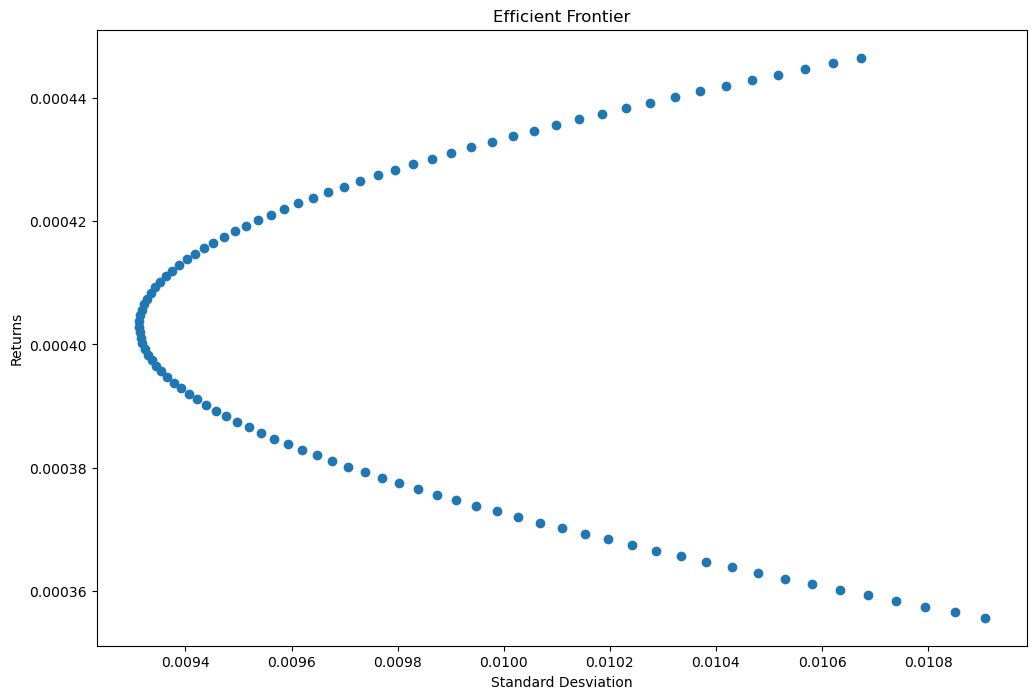

In [34]:
#Ahora podemos visualizar la gráfica de frontera eficiente
plt.figure(figsize=(12, 8))
plt.scatter(df_weights_combinations['portfolio_std_dev'], df_weights_combinations['portfolio_returns'])
plt.xlabel('Standard Desviation')
plt.ylabel('Returns')
plt.title('Efficient Frontier')

#Esta nos indica la combinación más eficiente para el portafolio, que sería la de esta zona,
# returns sobre 0,00042 y standars desviation sobre 0,0096(Superior/izquierda)
# que nos daría mayor rentabilidad con menor volatilidad(riesgo)